In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style("whitegrid", {'axes.grid' : False})
sb.set(font_scale = 2)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier 
from Tools.tools import rec
from Tools.tools import collection
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest

#### 1. Importer votre DataSet

In [2]:
df = pd.read_csv('./Dataset/'+os.listdir('./Dataset/')[0])

In [4]:
df.head(5)

,Fe1,Fe2,Fe3,Fe4,Fe5,Fe6,Fe7,Fe8,Fe9,Fe10,Fe11,Fe12,Target
0,14.274666,0.306604,-6.509358,25.684822,6.009788,8.236848,-4.603504,7.190116,-8.385201,8.234614,1.610211,0.485977,0.0
1,14.075767,-4.393329,-6.786652,15.713791,6.494777,8.307470,-0.646492,18.590163,-6.765775,10.011137,0.032082,1.595067,1.0
2,13.385394,-2.412716,-4.905458,18.909799,10.608101,11.484525,0.222476,10.676471,-9.668632,5.637295,-5.071390,0.665733,2.0
3,14.335635,-3.923458,-8.288954,21.251131,4.331520,2.935059,-5.941685,12.855108,-1.215089,11.138346,1.452981,1.936708,3.0
4,12.976791,-7.668485,-9.849166,13.470379,3.166024,7.288091,0.330541,18.057565,-6.420736,5.402359,-5.311179,6.554399,4.0


In [5]:
# selon quelles données on veut sélectionner
# df = df.iloc[:240,:]

#### 2. Checker les variables quantitatives/qualitatives et les valeurs manquantes 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fe1     440 non-null    float64
 1   Fe2     440 non-null    float64
 2   Fe3     440 non-null    float64
 3   Fe4     440 non-null    float64
 4   Fe5     440 non-null    float64
 5   Fe6     440 non-null    float64
 6   Fe7     440 non-null    float64
 7   Fe8     440 non-null    float64
 8   Fe9     440 non-null    float64
 9   Fe10    440 non-null    float64
 10  Fe11    440 non-null    float64
 11  Fe12    440 non-null    float64
 12  Target  440 non-null    float64
dtypes: float64(13)
memory usage: 44.8 KB


In [8]:
df.describe()

,Fe1,Fe2,Fe3,Fe4,Fe5,Fe6,Fe7,Fe8,Fe9,Fe10,Fe11,Fe12,Target
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,13.392723,-15.678716,-4.351348,4.509882,4.752673,-1.923197,1.709892,6.009051,-2.795247,3.273336,0.014614,1.104845,4.500000
std,2.251874,9.826878,5.172707,11.692770,4.988476,6.996632,3.314034,6.647960,4.489028,4.839960,3.869259,4.172348,2.875551
min,8.842483,-33.999218,-20.527578,-12.011691,-5.674680,-14.815182,-8.961207,-6.151173,-12.693762,-12.088923,-9.045685,-10.983585,0.000000
25%,11.084304,-21.758113,-8.131817,-7.069896,0.570256,-7.506239,-0.361427,0.352257,-6.024423,-0.717209,-2.783015,-2.123943,2.000000
50%,14.192614,-17.040308,-4.704118,1.824703,5.140637,-3.927217,1.712463,6.100699,-3.044637,4.106556,-0.277656,0.441999,4.500000
75%,15.202268,-7.295422,-1.061792,15.184342,8.469340,4.221967,3.953644,11.034809,0.173437,6.769473,2.716624,3.750725,7.000000
max,17.601392,4.205647,10.282961,35.322183,19.739664,15.076510,9.814816,21.738983,10.689613,15.096898,10.298641,11.608511,9.000000


In [9]:
y = df['Target']
y = y.astype(int)
X = df.iloc[:,:-1]
X.shape

(440, 12)

### Test de corrélation : sélection des variables les plus corrélées dans un DF X1

In [10]:
df.corrwith(df['Target'], method='pearson').abs().sort_values(ascending=False)

X1 = df.drop(['Fe8', 'Fe11', 'Fe5', 'Fe4', 'Fe10', 'Fe9', 'Fe12', 'Target'], axis=1)

In [11]:
X1.head()

,Fe1,Fe2,Fe3,Fe6,Fe7
0,14.274666,0.306604,-6.509358,8.236848,-4.603504
1,14.075767,-4.393329,-6.786652,8.307470,-0.646492
2,13.385394,-2.412716,-4.905458,11.484525,0.222476
3,14.335635,-3.923458,-8.288954,2.935059,-5.941685
4,12.976791,-7.668485,-9.849166,7.288091,0.330541


### Notre variable target (Y) est 'gender', Récuprer X et y à partir du jeu de données 

In [12]:
y = df['Target']
y = y.astype(int)
X = df.iloc[:,:-1]
# X.shape
# X = X1

#### 4. Diviser la DataSet en donneés d'apprentissage et de test (20% pour le test)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

In [14]:
# vérification de la répartition des valeurs pour la cible (train)
y_train.value_counts()

6    37
4    37
9    36
8    36
5    35
3    35
2    35
1    35
0    34
7    32
Name: Target, dtype: int64

In [15]:
# vérification de la répartition des valeurs pour la cible (test)
y_test.value_counts()

7    12
0    10
5     9
3     9
2     9
1     9
9     8
8     8
6     7
4     7
Name: Target, dtype: int64

In [16]:
X_train.shape

(352, 12)

## 6. Développer votre meilleur modèle de classification

In [17]:
resultats = dict()

### DecisionTreeClassifier

meilleur score (train) : 1.0
meilleur score (test) : 0.5113636363636364
meilleurs paramètres : {'decisiontreeclassifier__criterion': 'gini'}


<AxesSubplot:>

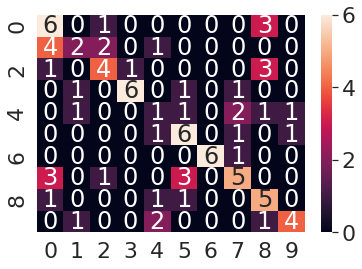

In [18]:
# dictionnaires de paramètres pour l'estimateur
parametres = {
    'decisiontreeclassifier__criterion' : ['gini', 'entropy'] 
}

# créer le pipeline
pipe1 = make_pipeline(StandardScaler(), DecisionTreeClassifier())

# créer la grille de recherche ; entrainement des données
mod = GridSearchCV(pipe1, param_grid=parametres, cv=5, scoring='accuracy')
mod.fit(X_train, y_train)
y_pred = mod.predict(X_test)


# les scores
strain = mod.score(X_train, y_train)
stest = mod.score(X_test, y_test)

resultats['Decision Tree'] = [strain, stest]

print(f'meilleur score (train) : {strain}')
print(f'meilleur score (test) : {stest}')
print(f'meilleurs paramètres : {mod.best_params_}')
sb.heatmap(confusion_matrix(y_test, y_pred), annot=True)

### RandomForestClassifier

meilleur score : 1.0
meilleur score : 0.6363636363636364
meilleurs paramètres : {'randomforestclassifier__bootstrap': False, 'randomforestclassifier__n_estimators': 200}


<AxesSubplot:>

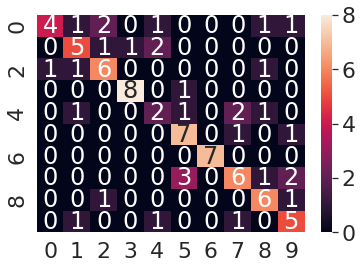

In [19]:
# dictionnaires de paramètres pour l'estimateur
parametres = {
    'randomforestclassifier__n_estimators' : [200],
    'randomforestclassifier__bootstrap' : [False]
}

# créer le pipeline
pipe1 = make_pipeline(StandardScaler(), RandomForestClassifier())

# créer la grille de recherche ; entrainement des données
mod = GridSearchCV(pipe1, param_grid=parametres, cv=2, scoring='accuracy')
mod.fit(X_train, y_train)
y_pred = mod.predict(X_test)

# les scores
strain = mod.score(X_train, y_train)
stest = mod.score(X_test, y_test)

resultats['Random Forest'] = [strain, stest]

print(f'meilleur score : {strain}')
print(f'meilleur score : {stest}')
print(f'meilleurs paramètres : {mod.best_params_}')
sb.heatmap(confusion_matrix(y_test, y_pred), annot=True)

### GradientBoostingClassifier

### MLPClassifier

meilleur score : 1.0
meilleur score : 0.7840909090909091
meilleurs paramètres : {'mlpclassifier__learning_rate_init': 0.002, 'mlpclassifier__max_iter': 5000, 'mlpclassifier__random_state': 50, 'mlpclassifier__warm_start': False}


<AxesSubplot:>

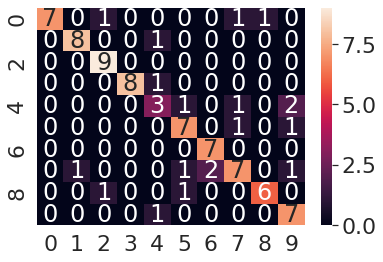

In [20]:
# dictionnaires de paramètres pour l'estimateur

parametres = {
    
    'mlpclassifier__max_iter' : [5000, 10000],
    'mlpclassifier__learning_rate_init' : [0.005, 0.007, 0.002],
    'mlpclassifier__warm_start' : [False, True],
    'mlpclassifier__random_state' : [50]
}

# créer le pipeline
pipe1 = make_pipeline(StandardScaler(), MLPClassifier())

# créer la grille de recherche ; entrainement des données
mod = GridSearchCV(pipe1, param_grid=parametres, cv=5, scoring='accuracy')
mod.fit(X_train, y_train)
y_pred = mod.predict(X_test)

# les scores
strain = mod.score(X_train, y_train)
stest = mod.score(X_test, y_test)

resultats['MLP classifier'] = [strain, stest]

print(f'meilleur score : {strain}')
print(f'meilleur score : {stest}')
print(f'meilleurs paramètres : {mod.best_params_}')
sb.heatmap(confusion_matrix(y_test, y_pred), annot=True)

### KNeighborsClassifier

meilleur score : 1.0
meilleur score : 0.6931818181818182
meilleurs paramètres : {'kneighborsclassifier__algorithm': 'brute', 'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 4, 'kneighborsclassifier__weights': 'distance'}


<AxesSubplot:>

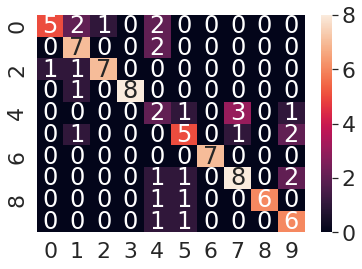

In [21]:
# dictionnaires de paramètres pour l'estimateur
parametres = {
    'kneighborsclassifier__n_neighbors' : [x for x in range(1, 20)],
    'kneighborsclassifier__weights' : ['uniform', 'distance'],
    'kneighborsclassifier__algorithm' : ['brute', 'kd_tree', 'ball_tree'],
    'kneighborsclassifier__metric' : ['minkowski', 'manhattan', 'euclidean'] 
}

# créer le pipeline
pipe1 = make_pipeline(StandardScaler(), KNeighborsClassifier())

# créer la grille de recherche ; entrainement des données
mod = GridSearchCV(pipe1, param_grid=parametres, cv=5, scoring='accuracy')
mod.fit(X_train, y_train)
y_pred = mod.predict(X_test)

# les scores
strain = mod.score(X_train, y_train)
stest = mod.score(X_test, y_test)

resultats['KNN'] = [strain, stest]

print(f'meilleur score : {strain}')
print(f'meilleur score : {stest}')
print(f'meilleurs paramètres : {mod.best_params_}')
sb.heatmap(confusion_matrix(y_test, y_pred), annot=True)

### XGBClassifier

meilleur score : 0.7670454545454546
meilleur score : 0.6477272727272727
meilleurs paramètres : {'xgbclassifier__booster': 'gblinear'}


<AxesSubplot:>

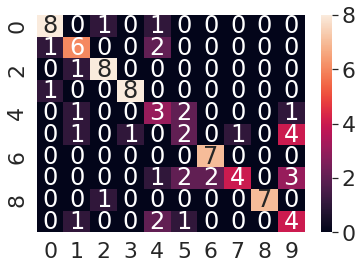

In [22]:
# dictionnaires de paramètres pour l'estimateur
parametres = {
    'xgbclassifier__booster' : ['gbtree', 'gblinear','dart']
}

# créer le pipeline
pipe1 = make_pipeline(StandardScaler(),XGBClassifier())

# créer la grille de recherche ; entrainement des données
mod = GridSearchCV(pipe1, param_grid=parametres, cv=5, scoring='accuracy')
mod.fit(X_train, y_train)
y_pred = mod.predict(X_test)

# les scores
strain = mod.score(X_train, y_train)
stest = mod.score(X_test, y_test)

resultats['XGB classifier'] = [strain, stest]

print(f'meilleur score : {strain}')
print(f'meilleur score : {stest}')
print(f'meilleurs paramètres : {mod.best_params_}')
sb.heatmap(confusion_matrix(y_test, y_pred), annot=True)

### SVM

/home/erwan/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/erwan/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/erwan/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/erwan/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
 

meilleur score : 0.7471590909090909
meilleur score : 0.6590909090909091
meilleurs paramètres : {'svc__gamma': 'auto', 'svc__kernel': 'poly', 'svc__max_iter': 100}


/home/erwan/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/erwan/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/erwan/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


<AxesSubplot:>

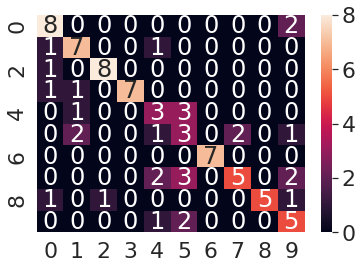

In [23]:

# dictionnaires de paramètres pour l'estimateur
parametres = {
    'svc__kernel' : ['rbf', 'poly','sigmoid' ],
    'svc__gamma' : ['auto', 'scale'],
    'svc__max_iter' : [20, 100]
}

ssc = StandardScaler().fit_transform(X_train)
# créer le pipeline
pipe1 = make_pipeline(StandardScaler(),SVC())

# créer la grille de recherche ; entrainement des données
mod = GridSearchCV(pipe1, param_grid=parametres, cv=5, scoring='accuracy')
mod.fit(X_train, y_train)
y_pred = mod.predict(X_test)

# les scores
strain = mod.score(X_train, y_train)
stest = mod.score(X_test, y_test)

resultats['SVC'] = [strain, stest]

print(f'meilleur score : {strain}')
print(f'meilleur score : {stest}')
print(f'meilleurs paramètres : {mod.best_params_}')
sb.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [24]:
resultats
for i,j in resultats.items():
    print(i)
    print(f'--Résultat du Train : {j[0]}')
    print(f'--Résultat du Test : {j[1]}')
    
    
    

Decision Tree
--Résultat du Train : 1.0
--Résultat du Test : 0.5113636363636364
Random Forest
--Résultat du Train : 1.0
--Résultat du Test : 0.6363636363636364
MLP classifier
--Résultat du Train : 1.0
--Résultat du Test : 0.7840909090909091
KNN
--Résultat du Train : 1.0
--Résultat du Test : 0.6931818181818182
XGB classifier
--Résultat du Train : 0.7670454545454546
--Résultat du Test : 0.6477272727272727
SVC
--Résultat du Train : 0.7471590909090909
--Résultat du Test : 0.6590909090909091


# Essai dans un programme

In [29]:
# Instanciation de l'objet de standardisation
scaler = StandardScaler().fit(X_train)
X_fit = scaler.transform(X_train)

# Création du modèle :
clf = MLPClassifier(learning_rate_init=0.002, max_iter=5000, random_state=50, warm_start= False )

In [43]:
import sounddevice as sd #sinon pip install sounddevice
import time #sinon pip install python-time
import scipy.io.wavfile as wav
from python_speech_features import mfcc #sinon pip install python_speech_features==0.4
import wave
import os

def rec(scaler, classifier, method):

    print("Attention, l'enregistrement commence dans :")
    
    for i in range(0,2):
        time.sleep(1)
        print(1-i)
    
    time.sleep(1)
    
    rate = 48000
    duration = 1
           
    

    print("Prononcer votre Digit : ")
    data = sd.rec(int(duration * rate), samplerate=rate, channels=1)
    sd.wait()
    time.sleep(1)    
    data = data / data.max() * np.iinfo(np.int16).max
    data = data.astype(np.int16)
    
    mfcc_feat = np.mean(mfcc(data,rate, numcep=12), axis=0)   
    mfcc_feat = np.expand_dims(mfcc_feat, axis=0)
    df = pd.DataFrame(mfcc_feat)
    

    if method=='pearson':
        df = pd.DataFrame(mfcc_feat, columns=['Fe1', 'Fe2', 'Fe3', 'Fe4', 'Fe5', 'Fe6', 'Fe7', 'Fe8', 'Fe9', 'Fe10',
       'Fe11', 'Fe12'])
        df = df.drop(['Fe8', 'Fe11', 'Fe5', 'Fe4', 'Fe10', 'Fe9', 'Fe12'], axis=1)
        mfcc_feat = np.array(df)
        
    if method=='chi2':
        df = pd.DataFrame(mfcc_feat, columns=['Fe1', 'Fe2', 'Fe3', 'Fe4', 'Fe5', 'Fe6', 'Fe7', 'Fe8', 'Fe9', 'Fe10',
       'Fe11', 'Fe12'])
        df = df.drop(['Fe1', 'Fe4', 'Fe6', 'Fe8', 'Fe9', 'Fe11', 'Fe12'], axis=1)
        mfcc_feat = np.array(df)

    
        
      
    
    pred = classifier.predict(scaler.transform(mfcc_feat))
    
    
    
    print('------------------')
    print('Digit : ', pred[0])
    print('------------------')


rec(scaler, xgb, 'none')

Attention, l'enregistrement commence dans :
1
0
Prononcer votre Digit : 
------------------
Digit :  5
------------------
